In [3]:
## This is a Juptyer notebook for the Kaggle dataset:brain-tumor-detection

# %pip install -q -U keras-tuner
# %pip install torch
# %pip install torchvision

In [4]:
# import the necessary packages
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
import tensorflow as tf
import keras
import torch
import glob
import torchvision
import pathlib
from tqdm import tqdm


from keras.models import Sequential
from keras.layers import Dense,Conv2D
# from keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing import image
from keras.layers import MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam 
from kerastuner import RandomSearch

import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable


from skimage.io import imread
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

C:\Users\Kai Qi Yan\AppData\Local\Temp\ipykernel_20372\4238642426.py:24: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


Train images shape: (2870, 300, 300, 3)
Test images shape: (394, 300, 300, 3)


array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

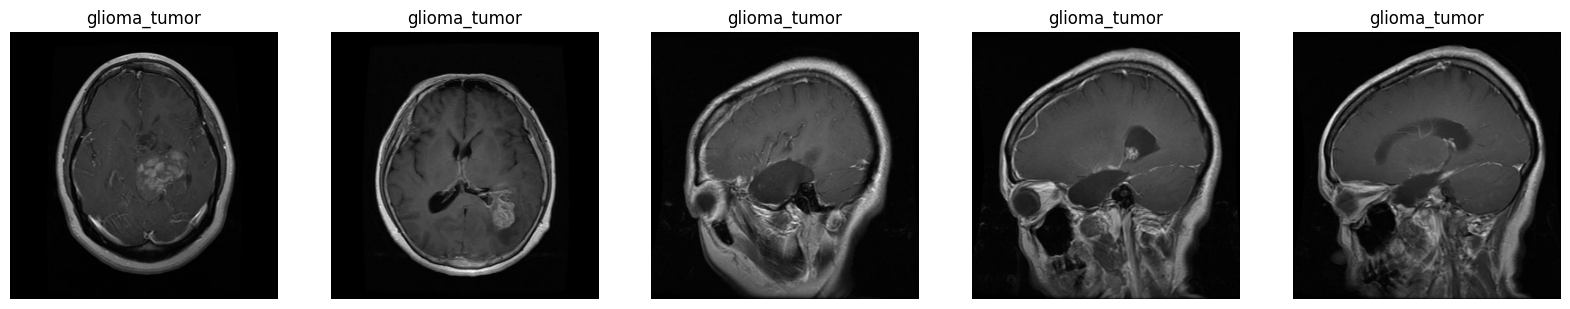

In [12]:
# Define the data path
path_train = (r'archive\Training')
path_test = (r'archive\Testing')

# Define the image size
img_size= 300

# Define the image list
train_img = []
train_labels = []
test_img = []
test_labels = []


# Load the images
for i in os.listdir(path_train):
    dir_path = os.path.join(path_train, i)  # Use os.path.join for correct path construction
    for j in os.listdir(dir_path):
        img_path = os.path.join(dir_path, j)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (img_size, img_size))
            train_img.append(resized_img)
            train_labels.append(i)
        else:
            print(f"Failed to load image: {img_path}")

for i in os.listdir(path_test):
    dir_path = os.path.join(path_test, i)  # Use os.path.join for correct path construction
    for j in os.listdir(dir_path):
        img_path = os.path.join(dir_path, j)
        img = cv2.imread(img_path)
        if img is not None:
            resized_img = cv2.resize(img, (img_size, img_size))
            test_img.append(resized_img)
            test_labels.append(i)
        else:
            print(f"Failed to load image: {img_path}")

# Convert the images to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)

# Display the shape of the images
print(f"Train images shape: {train_img.shape}")
print(f"Test images shape: {test_img.shape}")

# Display the first few images
plt.figure(figsize=(20, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_img[i])
    plt.title(train_labels[i])
    plt.axis('off')
